# How to use SVD to align sets of points

In [110]:
using Gadfly; set_default_plot_size(11cm, 10cm)
using DataFrames

## Alignment algorithm

In [111]:
# maps movedpoints back on to referencepoints, returning the best fit remappedpoints
function align(movedpoints,refrencepoints)
    P = movedpoints;
    Q = refrencepoints;

    p = mean(P,2);
    q = mean(Q,2);

    X = P .- p;
    Y = Q .- q;

    A = X*Y';
    U,S,V = svd(A);

    d = sign(det(V*U'))
    S_rh = eye(dim); S_rh[dim,dim] = d; #prohibit reflections

    R = V*S_rh*U'

    t = q - R*p

    remappedpoints = R*P .+ t;
end

align (generic function with 1 method)

## 2 Dimensions

In [112]:
dim = 2
npoints = 4
scale = 10
noise = 0.01*scale

mypoints = scale*( (rand(dim,npoints) - 0.5) .+ 0.5*rand(dim) ) # initial set of points

θ = 2*pi*rand(); # random angle by which original points are rotated
offset = 0.5*scale*rand(dim); # random translation of original points

function Rot_2D(θ)
    [cos(θ) -sin(θ);
     sin(θ)  cos(θ)]
end

newpoints = Rot_2D(θ)*mypoints + noise*randn(dim,npoints) .+ offset;

In [113]:
remappedpoints = align(newpoints,mypoints);

In [114]:
df1 = DataFrame(x = vec(mypoints[1,:]), y = vec(mypoints[2,:]), tag="original");
df2 = DataFrame(x = vec(newpoints[1,:]), y = vec(newpoints[2,:]), tag="translated");
df3 = DataFrame(x = vec(remappedpoints[1,:]), y = vec(remappedpoints[2,:]), tag="aligned");
dftot = vcat(df1,df2,df3);

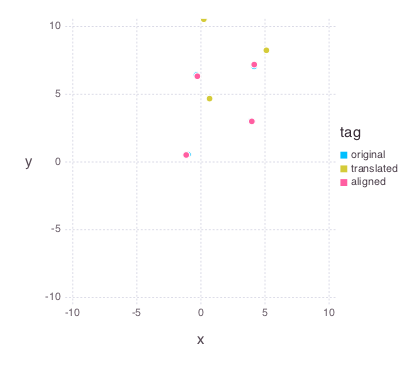

In [115]:
plot(dftot, x="x", y="y",color="tag", Coord.Cartesian(xmin=-scale, xmax=scale, ymin=-scale, ymax=scale), Geom.point)

## 3 Dimensions

In [116]:
dim = 3
npoints = 100
scale = 10
noise = 0.01*scale

mypoints = scale*( (rand(dim,npoints) - 0.5) .+ 0.5*rand(dim) ) # initial set of points

θ = 2*π*rand();
ϕ = π*rand();
ψ = 2*π*rand();
offset = 0.5*scale*rand(dim); # random translation of original points

# return rotation matrix implied by the three euler angles
# uses z-x-z' convention
function rot_3D(θ,ϕ,ψ)
    R11 =  cos(ψ)*cos(ϕ) - cos(θ)*sin(ϕ)*sin(ψ)
    R12 =  cos(ψ)*sin(ϕ) + cos(θ)*cos(ϕ)*sin(ψ)
    R13 =  sin(ψ)*sin(θ)
    R21 = -sin(ψ)*cos(ϕ) - cos(θ)*sin(ϕ)*cos(ψ)
    R22 = -sin(ψ)*sin(ϕ) + cos(θ)*cos(ϕ)*cos(ψ)
    R23 =  cos(ψ)*sin(θ)
    R31 =  sin(θ)*sin(ϕ)
    R32 = -sin(θ)*cos(ϕ)
    R33 =  cos(θ)
    R = [R11 R12 R13;
         R21 R22 R23;
         R31 R32 R33]
end

newpoints = rot_3D(θ,ϕ,ψ)*mypoints + noise*randn(dim,npoints) .+ offset;

In [117]:
remappedpoints = align(newpoints,mypoints);

In [118]:
df3d_1 = DataFrame(x = vec(mypoints[1,:]), y = vec(mypoints[2,:]), z = vec(mypoints[3,:]), tag="original");
df3d_2 = DataFrame(x = vec(newpoints[1,:]), y = vec(newpoints[2,:]), z = vec(newpoints[3,:]), tag="new");
df3d_3 = DataFrame(x = vec(remappedpoints[1,:]), y = vec(remappedpoints[2,:]), z = vec(remappedpoints[3,:]), tag="remap");
df3d_tot = vcat(df3d_1,df3d_2,df3d_3);

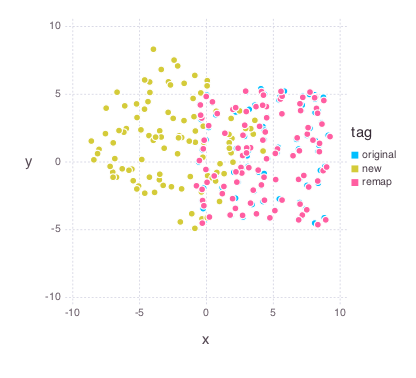

In [119]:
plot(df3d_tot, x="x", y="y",color="tag", Coord.Cartesian(xmin=-scale, xmax=scale, ymin=-scale, ymax=scale), Geom.point)

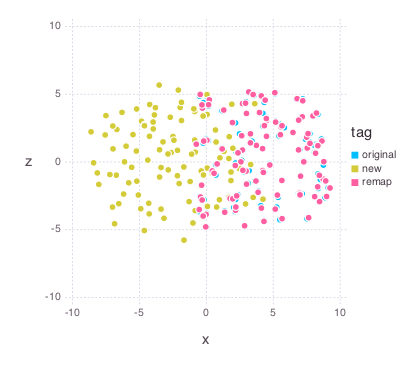

In [120]:
plot(df3d_tot, x="x", y="z",color="tag", Coord.Cartesian(xmin=-scale, xmax=scale, ymin=-scale, ymax=scale), Geom.point)

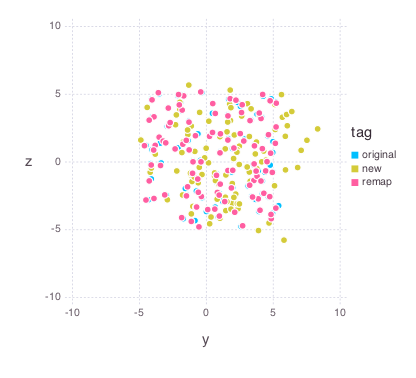

In [121]:
plot(df3d_tot, x="y", y="z",color="tag", Coord.Cartesian(xmin=-scale, xmax=scale, ymin=-scale, ymax=scale), Geom.point)